<a href="https://colab.research.google.com/github/eghrthrjdtsed/Transfer_learning/blob/master/Model_as_a_service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extr

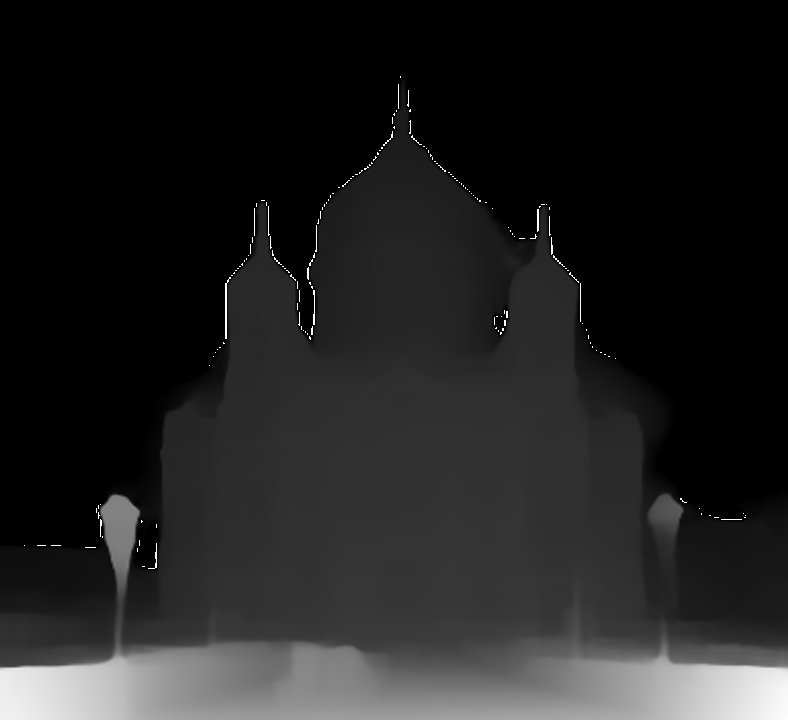

In [11]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation") # model="Intel/dpt-large"
output = depth_estimator("/content/788px-Moscow_July_2011-7a.jpg")

# Вызов этой команды возвращает нам тензор, в котором дана оценочная информация
# об удаленности каждого объекта от зрителя (в метрах)
output["depth"]

# Поработаем с текстом

In [12]:
from transformers import pipeline

question_answerer = pipeline(
    "question-answering",
    model="Den4ikAI/rubert-large-squad",
    tokenizer="Den4ikAI/rubert-large-squad"
)

config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/713M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:
context = """
Во́льфганг Амаде́й Мо́царт (нем. Wolfgang Amadeus Mozart, МФА МФА: [ˈvɔlfɡaŋ amaˈdeus ˈmoːtsaʁt](инф.); полное имя — Иога́нн Хризосто́м Во́льфганг Амаде́й Мо́царт; 27 января 1756, Зальцбург — 5 декабря 1791, Вена) — австрийский композитор и музыкант-виртуоз. Один из самых популярных классических композиторов, Моцарт оказал большое влияние на мировую музыкальную культуру.
По свидетельству современников, Моцарт обладал феноменальным музыкальным слухом, памятью и способностью к импровизации. Самый молодой член[К 1] Болонской филармонической академии (с 1770 года) за всю её историю, а также самый молодой кавалер ордена Золотой шпоры (1770)."""

In [14]:
result = question_answerer(question="Моцарт был кавалером какого ордена?", context=context)
print( result['answer'] )

Золотой шпоры


In [15]:
result


{'score': 0.5918433666229248,
 'start': 624,
 'end': 637,
 'answer': 'Золотой шпоры'}

In [16]:
result = question_answerer(question="Кем был Моцарт?", context=context)
print( result['answer'] )

австрийский композитор и музыкант-виртуоз


# Домашнее задание

Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.

1. Найдите тип задач Sentiment Analysis на huggingface.co
2. Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

In [17]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment-rusentiment")


config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/495 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [18]:
results = classifier([
    "Отличный товар",
    "Мне не понравилось",
    "Прекрасно выглядит, ничего не меняйте!",
    "Ничего не понял",
    "У меня не работала розетка, в остальном все отлично"
])

for result in results:
    print(result)


{'label': 'POSITIVE', 'score': 0.9611173272132874}
{'label': 'NEGATIVE', 'score': 0.7071502208709717}
{'label': 'POSITIVE', 'score': 0.6519917249679565}
{'label': 'NEUTRAL', 'score': 0.9760662317276001}
{'label': 'NEUTRAL', 'score': 0.3814290463924408}


# И напоследок поработаем с кодом

In [19]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="huggingface/CodeBERTa-small-v1",
    tokenizer="huggingface/CodeBERTa-small-v1"
)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/994k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/483k [00:00<?, ?B/s]

In [25]:
python_code = """
# a list of numbers
my_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]
my_numbers.<mask>


"""

In [26]:
fill_mask( python_code )

[{'score': 0.5379460453987122,
  'token': 1942,
  'token_str': 'sort',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.sort\n\n\n'},
 {'score': 0.08208280801773071,
  'token': 3059,
  'token_str': 'clear',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.clear\n\n\n'},
 {'score': 0.058297257870435715,
  'token': 5648,
  'token_str': 'reverse',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.reverse\n\n\n'},
 {'score': 0.02774082124233246,
  'token': 812,
  'token_str': 'append',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.append\n\n\n'},
 {'score': 0.018720267340540886,
  'token': 808,
  'token_str': 'length',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.length\n\n\n'}]